La première chose à faire est d'importer tous les modules nécéssaires au bon fonctionnement de notre réseau de neurones

In [15]:

import numpy as np
import os
import random
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Rescaling
from tensorflow.keras.utils import image_dataset_from_directory
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.image import resize
import itertools
from sklearn.metrics import confusion_matrix


Nous allons maintenant initier nos répertoires (dataset) à des variables, un pour chaque type

In [16]:
# init my directories
train_directory = './Oiseaux/train/'
test_directory = './Oiseaux/test/'
val_directory = './Oiseaux/valid/'

On sélectionne et on liste nos catégories utilisés pour notre entrainement, ici nous en prenons 10

In [17]:
categories = os.listdir(train_directory) # list the names of the categories that in my data
print(str(len(categories)),'CATEGORIES are ', categories)
# selected_classes = random.sample(categories, 10)
# print(str(len(selected_classes)),'CATEGORIES are ', selected_classes)

category_count = len(categories)

10 CATEGORIES are  ['ABBOTTS BABBLER', 'ABBOTTS BOOBY', 'ABYSSINIAN GROUND HORNBILL', 'AFRICAN CROWNED CRANE', 'AFRICAN EMERALD CUCKOO', 'AFRICAN FIREFINCH', 'AFRICAN OYSTER CATCHER', 'AFRICAN PIED HORNBILL', 'AFRICAN PYGMY GOOSE', 'ALBATROSS']


Nous définissons les propriétés de nos images présentes dans nos datasets

In [18]:
train_data = tf.keras.preprocessing.image_dataset_from_directory(
 "./Oiseaux/train/",
    batch_size=64,
  image_size=(224,224), shuffle=True, validation_split=0.03, subset="training", seed=42
)

# test data have less images hence we take valid data as test data
val_data = tf.keras.preprocessing.image_dataset_from_directory(
 "./Oiseaux/valid/",
    batch_size=64,
  image_size=(224,224), shuffle=True, validation_split=0.03, subset="validation", seed=42
)

test_data = tf.keras.preprocessing.image_dataset_from_directory(
 "./Oiseaux/test/",
    batch_size=64,
  image_size=(224,224), shuffle=True, seed=42
)

Found 1601 files belonging to 10 classes.
Using 1553 files for training.


Found 50 files belonging to 10 classes.
Using 1 files for validation.
Found 50 files belonging to 10 classes.


On redimensionne nos images pour un fonctionnement optimal de notre réseau de neurones

In [19]:
# Votre code pour charger les ensembles de données

# Redimensionner les images dans l'ensemble d'entraînement
train_data_resized = train_data.map(lambda x, y: (resize(x, (56 , 56)), y))

# Redimensionner les images dans l'ensemble de validation
val_data_resized = val_data.map(lambda x, y: (resize(x, (56, 56)), y))

# Redimensionner les images dans l'ensemble de test
test_data_resized = test_data.map(lambda x, y: (resize(x, (56, 56)), y))


On utilise data_augmentation pour redéfinir quelques propriétés optionnels comme des rotations, des zooms etc..

In [20]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.2),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.1),
])

On définit maintenant le modèle que l'on souhaite utiliser et obtenir

In [21]:
modele = tf.keras.Sequential([
    data_augmentation,
    tf.keras.layers.Flatten(input_shape=(56, 56, 3)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(10, activation='softmax')
])

On compile le modèle

In [22]:
modele.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [23]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

On entraîne notre réseau de neurones avec les valeurs que l'on souhaite et le nombre d'épochs nécessaire pour obtenir une accuracy optimal

In [24]:
historique = modele.fit(
    train_data_resized,
    validation_data=(test_data_resized),
    epochs=100
)

Epoch 1/100


25/25 [==============================] - 4s 68ms/step - loss: 3.8245 - accuracy: 0.1526 - val_loss: 2.0859 - val_accuracy: 0.2800
Epoch 2/100
25/25 [==============================] - 2s 61ms/step - loss: 2.0652 - accuracy: 0.2267 - val_loss: 1.9389 - val_accuracy: 0.3600
Epoch 3/100
25/25 [==============================] - 2s 68ms/step - loss: 1.9882 - accuracy: 0.2550 - val_loss: 1.8150 - val_accuracy: 0.4000
Epoch 4/100
25/25 [==============================] - 2s 62ms/step - loss: 1.9265 - accuracy: 0.2827 - val_loss: 1.8169 - val_accuracy: 0.3000
Epoch 5/100
25/25 [==============================] - 2s 69ms/step - loss: 1.9294 - accuracy: 0.2853 - val_loss: 1.8087 - val_accuracy: 0.3800
Epoch 6/100
25/25 [==============================] - 2s 65ms/step - loss: 1.8643 - accuracy: 0.3213 - val_loss: 1.6377 - val_accuracy: 0.4400
Epoch 7/100
25/25 [==============================] - 2s 64ms/step - loss: 1.8478 - accuracy: 0.3310 - val_loss: 1.6271 - val_accuracy: 0.4200
Epoch 8/100
25/25 

MatPlotLib est nécessaire pour l'affichage d'un graphique avec les valeurs obtenus lors des epochs et de l'entraînement

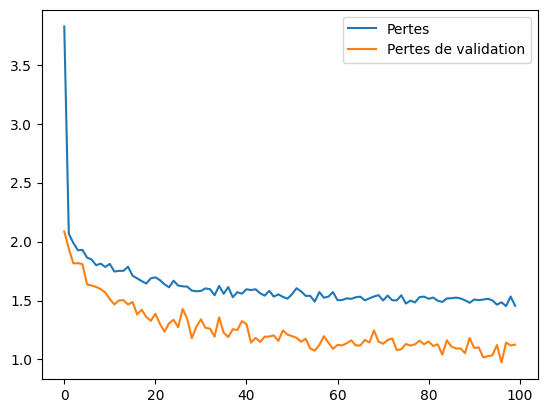

In [25]:
plt.plot(historique.history['loss'], label='Pertes')
plt.plot(historique.history['val_loss'], label='Pertes de validation')
plt.legend()

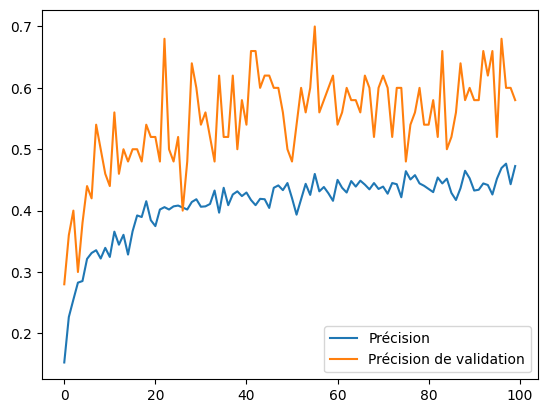

In [26]:
plt.plot(historique.history['accuracy'], label='Précision')
plt.plot(historique.history['val_accuracy'], label='Précision de validation')
plt.legend()

On créer notre matrice de confusion 

In [27]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Matrice de confusion',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
        print('Matrice de confusion normalisée')
    else:
        print('Matrice de confusion pas normalisée')
    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title = title
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt='.2f' if normalize else 'd'
    thresh=cm.max()/2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i,j], fmt),
                 horizontalalignment='center',
                 color='white' if cm[i,j] > thresh else 'black')
    plt.tight_layout()
    plt.ylabel('Vrai nom')
    plt.xlabel('Nom prédit')
    plt.show()

1/1 [==============================] - 0s 138ms/step
Matrice de confusion pas normalisée
[[1 1 1 0 0 1 1 0 0 0]
 [1 0 0 0 1 2 0 1 0 0]
 [1 1 0 1 1 0 0 1 0 0]
 [0 0 1 2 0 0 0 1 1 0]
 [0 1 0 3 0 1 0 0 0 0]
 [0 1 1 1 0 1 0 1 0 0]
 [0 0 0 1 1 0 1 0 1 1]
 [0 1 1 1 0 0 1 0 1 0]
 [0 0 1 0 1 0 2 1 0 0]
 [0 1 0 0 1 1 1 0 1 0]]


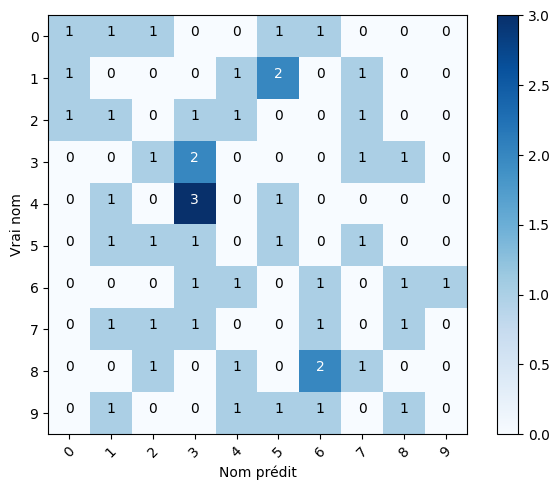

In [28]:
p_test = modele.predict(test_data_resized)
actual = [labels for _, labels in test_data_resized.unbatch()]
predicted = tf.concat(p_test, axis = 0)
predicted = tf.argmax(p_test, axis = 1)
cm = confusion_matrix(actual, predicted)
cm
plot_confusion_matrix(cm, list(range(10)))